<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp24-notes/blob/main/Day11_Scikit_Learn_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day11
## Scikit Learn Practice

#### CS167: Machine Learning, Spring 2024

Thursday, March 7, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_syllabus_sp24.pdf)

# Admin Stuff

You should be working on:
- [Notebook #4:](https://github.com/alimoorreza/CS167-SP24-Notebook-4)
    - Intro to Scikit Learn
    - **Due**: Tuesday, 03/19/24 by 11:59pm

- Next Tuesday  (post spring break): Random Forests
- Next Thursday (post spring break): Project #1 and Support Vector Machine (SVM)

# Introduction to Scikit Learn:

`scikit-learn` is one of Python's main Machine Learning Libraries.
- built on `NumPy`, `SciPy`, and `matplotlib`
- plays nicely with `pandas`
- https://scikit-learn.org/stable/

# Overview of the Scikit Learn 'Algorithm':

When working in Scikit Learn (`sklearn`), there is a general pattern that we can follow to implement any supported machine learning algorithm.

It goes like this:
1. Load your data using `pd.read_csv()`
2. Split your data `train_test_split()`
3. Create your classifier/regressor object
4. Call `fit()` to train your model
5. Call `predict()` to get predictions
6. Call a metric function to measure the performance of your model.

## All together, it looks something like this:

In [1]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
path = '/content/drive/MyDrive/cs167_fall23/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln, predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
'''print("--------------------------------------------------------------")
print(f"{'ACTUAL':<{20}} {'PREDICTIONS':<{20}}")
for i in range(len(test_sln)):
    actual_sample     = test_sln.iloc[i]
    predicted_sample  = predictions[i]
    print(f"{actual_sample:<{20}} {predicted_sample:<{20}}")

print("--------------------------------------------------------------")
'''
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))


Accuracy: 0.8333333333333334
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0                8               3
Iris-virginica             0                2               8


# Step 6: Evaluate the Model

Now that we have some predictions, we need to check to see how close we were by passing our predictions and the actual correct answers into a metric function.

| **Type of ML** | **Metric**                | **Description**                                                                                       | Scikit Learn                                                                                                                                                            |
|----------------|---------------------------|:-------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Classification | Accuracy                  | Number correct examples divided by total number                                                       | [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)                                               |
| Classification | Confusion Matrix          | Detailed table of where our model got confused.                                                       | [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)          |
| Regression     | Mean Absolute Error (MAE) | The average absolute distance from the target variable                                                | [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) |
| Regression     | Mean Squared Error (MSE)  | The average squared distance from the target variable                                                 | [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)    |
| Regression     | $R^2$                     | 1: perfectly fit data 0: same performance as guessing the mean of the target variable -1: really bad. | [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)                                  |

Available metrics can be found in the sklearn documentation [[sklearn metrics]](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [ ]:
from sklearn import metrics
#6. call a metric function to evaluate the model
print("Accuracy:", metrics.accuracy_score(test_sln, predictions))

Accuracy: 0.9


### Here's an example of displaying a confusion matrix:

Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=iris_labels)
print(conf_mat)

[[ 9  0  0]
 [ 0 10  1]
 [ 0  2  8]]


                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0               10               1
Iris-virginica             0                2               8


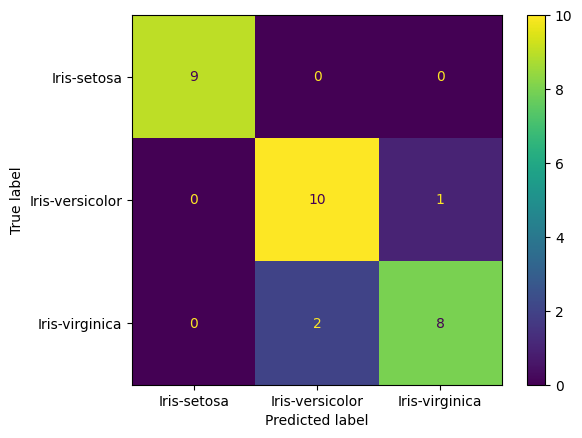

In [ ]:
#displaying a confusion matrix

# option #1: text
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

# option #2: prettify
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris_labels)
displ.plot()
plt.show()

# Normalizing using `StandardScaler`

**Documentation**: [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [ ]:
train_data.head()

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

# Scikit Learn Practice:

# 💬 Group Exercise #1:

1. Build a knn (try using [`sklearn.neighbors.kNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) and use it on the Iris Dataset
    - is there a difference in performance between using a **weighted** or **unweighted** knn?
    - what if you change the number of nearest neighbors to 21?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas

# build your model
knn = KNeighborsClassifier(n_neighbors=3)

# use fit() to train your model
knn.fit(train_data, train_sln)

# get predictions on the test_data
predictions = knn.predict(test_data)

# see how close your predictions were using an appropriate metric
'''print(f"predictions: {predictions}")
print(f"actual labels: {test_sln}")'''
acc = accuracy_score(test_sln, predictions)
print(f"accuracy: {acc}")
conf_mat = confusion_matrix(test_sln, predictions)
df = pandas.DataFrame(data=conf_mat, index=iris_labels, columns=iris_labels)
df.head()

accuracy: 0.9333333333333333


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,10,1
Iris-virginica,0,1,9


# Let's try regression now:

Using the `vehicles.csv` dataset, let's try out sklearn with regression:
- load the data, get the right subset
- set predictors and target variables
- use `train_test_split()` to split the data

In [ ]:
# load in the vehicles.csv data for scikit learn
import pandas
import numpy
from sklearn.model_selection import train_test_split

# load data, get the right subset
path = '/content/drive/MyDrive/cs167_sp24/datasets/vehicles.csv'
data = pandas.read_csv(path)
gas_vehicles = data[data['fuelType']=='Regular'][['year', 'cylinders', 'displ', 'comb08']]
gas_vehicles.dropna(inplace=True)

# set the predictor variables and target variable
predictors= ['year', 'cylinders', 'displ']
target= 'comb08'

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = train_test_split(gas_vehicles[predictors], gas_vehicles[target], test_size = 0.2, random_state=41)
train_data.head()

<ipython-input-10-30e3be856d8e>:8: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv(path)


,year,cylinders,displ
4256,1985,4.0,2.2
2685,1995,6.0,4.0
35058,2020,6.0,4.3
10678,1986,6.0,2.8
18702,1984,8.0,5.0


And then we do the next steps:
- build our model using `neighbors.KNeighborsRegressor()`
- fit our model using `fit()` and passing in `train_data` and `train_sln`
- get our predictions by calling `predict()`
- evaluate our predictions using `metrics.mean_squared_error()`, and `metrics.r2_score()`

In [ ]:
from sklearn import neighbors
# create our model
knn = neighbors.KNeighborsRegressor(n_neighbors=21)

# fit (train) the model to the data
knn.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
preds = knn.predict(test_data)
# use a metric to see how good our predictions are
print("R2: ", metrics.r2_score(test_sln, preds))
print("MAE: ", metrics.mean_absolute_error(test_sln, preds))
print("MSE: ", metrics.mean_squared_error(test_sln, preds))

R2:  0.1642937561304908
MAE:  0.5608630952380953
MSE:  0.5228387188208616


# 💬 Group Exercise #2: 🚗 🛺 🏎
Look up an appropriate Decision Tree algorithm and apply it to the vehicles data:
- https://scikit-learn.org/stable/modules/classes.html
- Using Default values of the decision tree, what is the $R^2$ metric?
  - [Check sklearn $R^2$ metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- Interpret the $R^2$ value... is it good or bad?

# 💬 Group Exercise #3:
Change your decision tree to have a `max_depth` of 3.
- does this help or hurt the decision tree performance?

Compare your decision tree to a kNN algorithm:
- what values of k seem to help the performance?
- What else can you do to help the performance?

Can you get a higher $R^2$ valuue using a knn algorithm or a decision tree?
- what does this indicate about the data?

# 💬 Group Exercise #4: 🐧🧊

Try out the `penguins_size.csv` dataset.
- Scikit learn Deicsion Trees and kNN only work with numeric data.
    - What will you need to do to get the penguin dataset to work? Hint: [`pandas.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) and [`pandas.DataFrame.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) will help.
- What is the best accuracy you can get if you use `species` as the target variable?
- Which model does the best?
- What parameters work the best?
- Does normalizing the data make a difference? If so, how?

In [5]:
import pandas as pd
penguins = pd.read_csv('/content/drive/MyDrive/cs167_sp24/datasets/penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Things to Notice: `pd.get_dummies()`
- ``island`, `sex` used to be categorical variables, but they no longer exist in `penguin_dummies`
- instead, we have `island_something`, or `sex_something`, etc.
- when we call `pd.get_dummies()`, we pass in the original dataframe, and the columns we want to convert
- `pd.get_dummies()` returns a new dataframe without the categorical columns.

In [6]:
# do pre-processing here: replace() and get_dummies() will help.
penguins_dummies = pd.get_dummies(penguins, columns=['island', 'sex'])
penguins_dummies.head()

# do pre-processing here: clean up your data now so that there is no NaN value
# ...

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,0,1,0
3,Adelie,NaN,NaN,NaN,NaN,0,0,1,0,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,0,1,0


In [ ]:
# train_test_split
target= 'species'
predictors = penguins.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(penguins[predictors], penguins[target], test_size = 0.2, random_state=41)
train_data.head()

In [ ]:
#build and test your models here


# 💬 Group Exercise #5: 🐧🧊

Now, switch the target variable from `species` to `body_mass_g`. This turns the problem into a regression.
- Find the model that works the best for this problem as a regression.
- What metric makes the most sense to use?
- What parameters give you the best performance?
- Does normalizing the data make a difference in the performance?

In [ ]:
penguins = pd.read_csv('/content/drive/MyDrive/cs167_sp24/datasets/penguins_size.csv')

In [ ]:
# pre-processing (replace() and get_dummies())


In [ ]:
target= 'body_mass_g'
predictors = penguins.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(penguins[predictors], penguins[target], test_size = 0.2, random_state=41)
train_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
214,Chinstrap,Dream,45.7,17.0,195.0,FEMALE
275,Gentoo,Biscoe,45.0,15.4,220.0,MALE
36,Adelie,Dream,38.8,20.0,190.0,MALE
202,Chinstrap,Dream,48.1,16.4,199.0,FEMALE
108,Adelie,Biscoe,38.1,17.0,181.0,FEMALE


In [ ]:
# build and test your models here:


# Notebook #4: Scikit Learn with Wine Quality Dataset

- [Notebook #4:](https://github.com/alimoorreza/CS167-SP24-Notebook-4)
    - Intro to Scikit Learn
    - **Due (after spring break)**: Tuesday, 03/19/24 by 11:59pm

## Part 1:
[3 points]** You must run at least 6 variations of the algorithms and display their results using an __appropriate regression metric__ (again, use the scikit-learn modules). I will be looking for the following to be included in your comparison:

* **k-Nearest-Neighbor** with a **small value of k**
* **k-Nearest-Neighbor** with a **large value of k**
* **weighted k-Nearest-Neighbor** with a **small value of k** (the same one you used for the unweighted version)
* **weighted k-Nearest-Neighbor** with a **large value of k** (the same one you used for the unweighted version)
* a **decision tree** with default parameter values
* a **decision tree**, setting some kind of parameter that results in a smaller tree

In [ ]:
import pandas as pd
wines = pd.read_csv('/content/drive/MyDrive/cs167_sp24/datasets/winequality-white.csv') # available in the "Datasets" section of the blackboard
target = 'quality'
predictors = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol']
train_data, test_data, train_sln, test_sln = train_test_split(wines[predictors], wines[target], test_size = 0.2, random_state=41)
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.70
728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.50
1366,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.80
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.10
1456,6.0,0.54,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55


## Part 2: w-kNN on Normalized data
Normalize the data and run a weighted k-Nearest Neighbors algorithm on it (from sklearn,  not the one we wrote from scratch). You can choose the k value. To Normalize, use the [`sklearn.preprocessing.StandardScalar`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn.

## Part 3:
Use a Markup cell to answer the following questions:
* What algorithm performed better? kNN, weighted-kNN, Decision Trees? Why do you think this was the case?
* What effect did normalizing the data have on your results? Explain.

# Work Time 📝

Use what time we have left to work on Notebook #4.